In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
Dataset=pd.read_csv("mnist_train.csv/mnist_train.csv")

In [37]:
Dataset=np.array(Dataset)

In [38]:
sample=Dataset[0]

In [39]:
y_unencoded=sample[0]

In [40]:
x=sample[1:].reshape((28,28))

In [41]:
x.shape

(28, 28)

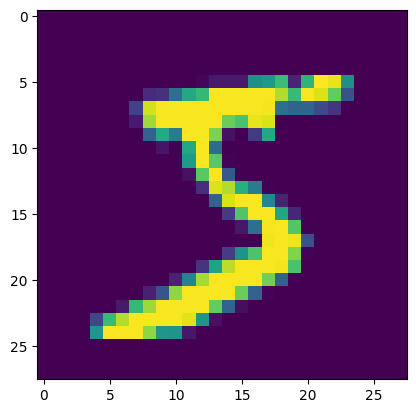

In [42]:
x=x/255
plt.gray
plt.imshow(x,interpolation="nearest")
plt.show()

In [43]:
y_unencoded

5

In [44]:
x

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [45]:
def init_filters():
    f1=np.random.normal(size=(5,5))
    f2=np.random.normal(size=(5,5))
    f3=np.random.normal(size=(5,5))
    f4=np.random.normal(size=(5,5))
    f5=np.random.normal(size=(5,5))
    f6=np.random.normal(size=(5,5))
    f7=np.random.normal(size=(5,5))
    f8=np.random.normal(size=(5,5))
    f9=np.random.normal(size=(5,5))
    f10=np.random.normal(size=(5,5))
    return f1,f2,f3,f4,f5,f6,f7,f8,f9,f10


def max_pool(arr,pool_filter=2):
    stride=pool_filter
    if arr.shape[0]%pool_filter==0:
        row_padding=0
    else:
        row_padding=pool_filter-(arr.shape[0]%pool_filter)
    
    if arr.shape[1]%pool_filter==0:
        col_padding=0
    else:
        col_padding=pool_filter-(arr.shape[1]%pool_filter)
    
    
    input=np.zeros((arr.shape[0]+row_padding,arr.shape[1]+col_padding))
    input[:arr.shape[0],:arr.shape[1]]=arr
    
    col_pooled=int((input.shape[1]-pool_filter)/stride)+1 #or int((arr.shape[0]+row_padding-pool_filter)/stride)+1
    row_pooled=int((input.shape[0]-pool_filter)/stride)+1 #or int((arr.shape[1]+col_padding-pool_filter)/stride)+1
    
    pooled=np.zeros((row_pooled,col_pooled))
    
    skeleton=np.zeros(input.shape)
    
    for i in range (0,row_pooled):
        for j in range(0,col_pooled):
            '''obtaining max_pool output'''
            pooled[i,j]=(input[(stride*i):(stride*i)+pool_filter,(stride*j):(stride*j)+pool_filter]).max()

            '''obtaining skeleton for max_pool back prop'''
            max=pooled[i,j]
            [p,q]=find_index(input[(stride*i):(stride*i)+pool_filter,(stride*j):(stride*j)+pool_filter],max)
            skeleton[(stride*i):(stride*i)+pool_filter,(stride*j):(stride*j)+pool_filter][p,q]=1
            # [(stride*i):(stride*i)+pool_filter,(stride*j):(stride*j)+pool_filter]  selects the current window the filter is over 
            # [p,q] is the index where max value is in the current max_pool filter window 
            
    return pooled,skeleton


def find_index(arr,v):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i,j]==v:
                return [i,j]

def convolve(image,kernel,padding=1,stride=1):
    arr=np.zeros((image.shape[0]+padding*2,image.shape[1]+padding*2))
    arr[padding:-1*padding,padding:-1*padding]=image

    col_out_dim=int((image.shape[1]+(2*padding)-kernel.shape[1])/stride)+1
    row_out_dim=int((image.shape[0]+(2*padding)-kernel.shape[0])/stride)+1

    output=np.zeros((row_out_dim,col_out_dim))

    for i in range (0,row_out_dim):
        for j in range(0,col_out_dim):
            output[i,j]=(kernel*arr[stride*i:((stride*i)+kernel.shape[0]),stride*j:(stride*j)+kernel.shape[1]]).sum()
    return output

def relu(input):
    return np.maximum(0,input)


def convolution_epoch(x,f):
    
    output=convolve(x,f)
    relu_op=relu(output)
    pooled,skeleton=max_pool(relu_op)
    flattened=pooled.reshape((169,1))
    return flattened,skeleton
    

In [68]:
(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10)=init_filters()
result1,skeleton1=convolution_epoch(x,f1)
result2,skeleton2=convolution_epoch(x,f2)
result3,skeleton3=convolution_epoch(x,f3)
result4,skeleton4=convolution_epoch(x,f4)
result5,skeleton5=convolution_epoch(x,f5)
result6,skeleton6=convolution_epoch(x,f6)
result7,skeleton7=convolution_epoch(x,f7)
result8,skeleton8=convolution_epoch(x,f8)
result9,skeleton9=convolution_epoch(x,f9)
result10,skeleton10=convolution_epoch(x,f10)

cnn_op=np.concatenate((result1,result2,result3,result4,result5,result6,result7,result8,result9,result10),axis=0)
result10.shape,cnn_op.shape
skeleton1

array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 

In [47]:
def minmax_scaler(input):    
    min=input.min()
    max=input.max()
    scaled=(input - min)/(max-min)
    return scaled
scaled=minmax_scaler(cnn_op)

In [48]:
def encoded(y):
  result=np.zeros((10,1))
  result[y,0]=1
  return result

In [49]:
def initialize_weights():
    w1=np.random.rand(10,1690) - 0.5
    b1=np.random.rand(10,1) - 0.5
    w2=np.random.rand(10,10) - 0.5
    b2=np.random.rand(10,1) - 0.5
    return w1,b1,w2,b2

In [50]:
def relu_der(z):
    return z>0

In [51]:
#scaled is the input i.e. x
w1,b1,w2,b2=initialize_weights()
def forward(x,w1,b1,w2,b2):
    z1=w1.dot(x) + b1
    a1=relu(z1)
    z2=w2.dot(a1) + b2
    a2=relu(z2)
    return z1,a1,z2,a2
z1,a1,z2,a2=forward(scaled,w1,b1,w2,b2)

In [52]:
z1,a1,z2,a2

(array([[-1.43660308],
        [-0.94231664],
        [-5.49574672],
        [-0.8728171 ],
        [-1.81719808],
        [-0.66035133],
        [ 4.85069272],
        [ 4.71009849],
        [ 8.12840747],
        [ 3.24774879]]),
 array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [4.85069272],
        [4.71009849],
        [8.12840747],
        [3.24774879]]),
 array([[ 2.28741696],
        [-5.34355856],
        [-0.7535722 ],
        [ 0.26194753],
        [ 0.47676581],
        [-2.18716385],
        [-4.03072732],
        [-4.74726344],
        [-3.99951381],
        [ 3.06376306]]),
 array([[2.28741696],
        [0.        ],
        [0.        ],
        [0.26194753],
        [0.47676581],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [3.06376306]]))

In [53]:
def back_prop(y_unencoded,z1,a1,z2,a2):
    
    dc_z2=a2-encoded(y_unencoded)
    dc_w2=dc_z2.dot((a1.T))
    dc_b2=dc_z2
    
    dc_z1=(w2.dot(dc_z2))*(relu_der(z1))
    dc_w1=dc_z1.dot((scaled.T))
    dc_b1=dc_z1

    dc_x=(w1.T).dot(dc_z1)
    
    return dc_w1,dc_b1,dc_w2,dc_b2,dc_x
def update_params(alpha,dc_w1,dc_b1,dc_w2,dc_b2,w1,b1,w2,b2):
    w1=w1-(alpha*dc_w1)
    b1=b1-(alpha*dc_b1)
    w2=w2-(alpha*dc_w2)
    b2=b2-(alpha*dc_b2)
    return w1,b1,w2,b2

In [54]:
dc_w1,dc_b1,dc_w2,dc_b2,dc_x=back_prop(y_unencoded,z1,a1,z2,a2)

In [55]:
w1,b1,w2,b2=update_params(0.45,dc_w1,dc_b1,dc_w2,dc_b2,w1,b1,w2,b2)

In [56]:
print(w1.shape,b1.shape,w2.shape,b2.shape)

(10, 1690) (10, 1) (10, 10) (10, 1)


In [57]:
#gradient wrt Input layer of dense layer 
dc_x

array([[-0.78059342],
       [-0.30354008],
       [ 0.38046749],
       ...,
       [ 0.34430709],
       [ 0.24852636],
       [-0.18884655]])

In [58]:
dc_x1=dc_x[0:169]
dc_x2=dc_x[169:169*2]
dc_x3=dc_x[169*2:169*3]
dc_x4=dc_x[169*3:169*4]
dc_x5=dc_x[169*4:169*5]
dc_x6=dc_x[169*5:169*6]
dc_x7=dc_x[169*6:169*7]
dc_x8=dc_x[169*7:169*8]
dc_x9=dc_x[169*8:169*9]
dc_x10=dc_x[169*9:169*10]

In [59]:
dc_x10.shape

(169, 1)

In [60]:
dc_ft1=dc_x1.reshape((13,13))
dc_ft2=dc_x2.reshape((13,13))
dc_ft3=dc_x3.reshape((13,13))
dc_ft4=dc_x4.reshape((13,13))
dc_ft5=dc_x5.reshape((13,13))
dc_ft6=dc_x6.reshape((13,13))
dc_ft7=dc_x7.reshape((13,13))
dc_ft8=dc_x8.reshape((13,13))
dc_ft9=dc_x9.reshape((13,13))
dc_ft10=dc_x10.reshape((13,13))

In [61]:
dc_ft9.shape

(13, 13)

In [62]:
pooled=np.array([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,12]])
filter_size=3
unpooled_rows=pooled.shape[0]*filter_size
unpooled_cols=pooled.shape[1]*filter_size
unpooled=np.zeros((unpooled_rows,unpooled_cols))
for i in range(len(pooled)):
    for j in range(len(pooled[i])):
        unpooled[i*filter_size:i*filter_size+filter_size,j*filter_size:j*filter_size+filter_size]=(np.zeros((filter_size,filter_size))+1)*pooled[i,j]
unpooled

array([[ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  4.],
       [ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  4.],
       [ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,  7.,  8.,  8.,  8.],
       [ 5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,  7.,  8.,  8.,  8.],
       [ 5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,  7.,  8.,  8.,  8.],
       [ 9.,  9.,  9., 10., 10., 10., 11., 11., 11., 12., 12., 12.],
       [ 9.,  9.,  9., 10., 10., 10., 11., 11., 11., 12., 12., 12.],
       [ 9.,  9.,  9., 10., 10., 10., 11., 11., 11., 12., 12., 12.]])

In [63]:
def undo_maxpool(pooled,skeleton,filter_size=2):
    
    expanded_rows=pooled.shape[0]*filter_size
    expanded_cols=pooled.shape[1]*filter_size
    expanded=np.zeros((expanded_rows,expanded_cols))
    for i in range(len(pooled)):
        for j in range(len(pooled[i])):
            expanded[i*filter_size:i*filter_size+filter_size,j*filter_size:j*filter_size+filter_size]=(np.zeros((filter_size,filter_size))+1)*pooled[i,j]
    #print(expanded)
    return expanded*skeleton

In [64]:
#testing unpooling
pooled=np.array([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,12]])
skeleton=np.zeros((6,8))
skeleton[0,0],skeleton[5,7]=1,1
skeleton


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [65]:
undo_maxpool(pooled,skeleton)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]])

In [66]:
dc_A1=undo_maxpool(dc_ft1,skeleton1)
dc_A2=undo_maxpool(dc_ft2,skeleton2)
dc_A3=undo_maxpool(dc_ft3,skeleton3)
dc_A4=undo_maxpool(dc_ft4,skeleton4)
dc_A5=undo_maxpool(dc_ft5,skeleton5)
dc_A6=undo_maxpool(dc_ft6,skeleton6)
dc_A7=undo_maxpool(dc_ft7,skeleton7)
dc_A8=undo_maxpool(dc_ft8,skeleton8)
dc_A9=undo_maxpool(dc_ft9,skeleton9)
dc_A10=undo_maxpool(dc_ft10,skeleton10)
dc_A1.shape

(26, 26)

In [67]:
dc_O1=dc_A1*relu_der(output1) #create a dictionary where all the outputs and EVERYTHIGN is accesible 

NameError: name 'output1' is not defined